# EDA and Data Cleaning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-and-Data-Cleaning" data-toc-modified-id="EDA-and-Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA and Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read in data</a></span></li><li><span><a href="#Merge-Goolge-dataset-with-Income-dataset" data-toc-modified-id="Merge-Goolge-dataset-with-Income-dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Merge Goolge dataset with Income dataset</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Create-aggregated-features-for-each-zip-code" data-toc-modified-id="Create-aggregated-features-for-each-zip-code-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Create aggregated features for each zip code</a></span></li></ul></li><li><span><a href="#Create-transformation-columns-using-demographic-information-from-'income'-dataset" data-toc-modified-id="Create-transformation-columns-using-demographic-information-from-'income'-dataset-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Create transformation columns using demographic information from 'income' dataset</a></span></li><li><span><a href="#Investigate-target-column-'home_price_to_income_ratios'" data-toc-modified-id="Investigate-target-column-'home_price_to_income_ratios'-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Investigate target column 'home_price_to_income_ratios'</a></span></li><li><span><a href="#EDA:-Numerical-Data" data-toc-modified-id="EDA:-Numerical-Data-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>EDA: Numerical Data</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Tree" data-toc-modified-id="Tree-1.8.3"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>Tree</a></span></li><li><span><a href="#Bagged-Tree" data-toc-modified-id="Bagged-Tree-1.8.4"><span class="toc-item-num">1.8.4&nbsp;&nbsp;</span>Bagged Tree</a></span></li><li><span><a href="#Ada-Boost" data-toc-modified-id="Ada-Boost-1.8.5"><span class="toc-item-num">1.8.5&nbsp;&nbsp;</span>Ada Boost</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-1.8.6"><span class="toc-item-num">1.8.6&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-1.8.7"><span class="toc-item-num">1.8.7&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-1.8.8"><span class="toc-item-num">1.8.8&nbsp;&nbsp;</span>Polynomial Regression</a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-1.8.9"><span class="toc-item-num">1.8.9&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li></ul></li></ul></li></ul></div>

## Import libraries

In [1]:
#pip install plotly-geo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Geographical Data Visualization
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Display Preference
pd.set_option('display.max_columns', None)

## Read in data

In [3]:
google = pd.read_csv('../data/clean_google_data_nyc.csv')
income = pd.read_csv('../data/clean_income_by_zip_nyc.csv')

In [4]:
google.head()

,city,state,zipcode,name,open_now,place_id,price_level,rating,user_ratings_total,searched_keyword,searched_zipcode,location_lat,location_lng,compound_code,global_code,art_gallery,atm,bakery,bar,beauty_salon,bicycle_store,book_store,cafe,car_dealer,car_repair,car_wash,clothing_store,convenience_store,department_store,drugstore,electronics_store,establishment,finance,florist,food,funeral_home,furniture_store,gas_station,general_contractor,grocery_or_supermarket,hair_care,hardware_store,health,home_goods_store,jewelry_store,laundry,liquor_store,local_government_office,locksmith,lodging,meal_delivery,meal_takeaway,movie_rental,night_club,park,parking,pet_store,pharmacy,point_of_interest,premise,restaurant,school,shoe_store,shopping_mall,spa,storage,store,supermarket,tourist_attraction,travel_agency
0,New York,NY,10001,Sprint Store,True,ChIJCV0vTalZwokR61PIDIe0gI0,2.0,3.4,276,stores,10001,40.750269,-73.989655,Q226+44 New York,87G8Q226+44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,New York,NY,10001,Duane Reade,True,ChIJJwQ3561ZwokRuYknT0uxER8,2.0,3.9,50,stores,10001,40.751744,-73.993482,Q224+MJ New York,87G8Q224+MJ,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,New York,NY,10001,Macy's,True,ChIJ3xjWra5ZwokRrwJ0KZ4yKNs,2.0,4.4,51032,stores,10001,40.750802,-73.989483,Q226+86 New York,87G8Q226+86,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,New York,NY,10001,Uniqlo,True,ChIJX6mEEqlZwokRtDQOWIDVc3I,1.0,4.4,3962,stores,10001,40.749488,-73.986632,P2X7+Q8 New York,87G8P2X7+Q8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,New York,NY,10001,B&H Photo Video - Electronics and Camera Store,False,ChIJI93dPbJZwokRIoOEoivEDQs,NaN,4.6,22772,stores,10001,40.752945,-73.996337,Q233+5F New York,87G8Q233+5F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [5]:
income.head()

,zipcode,median_household_income,per_capita_income,population,population_density_square_miles,housing_units,median_home_value,home_price_to_income_ratios
0,10001,88526.0,84765.0,22924,37306.6,14141,343400.0,3.879086
1,10002,35859.0,32694.0,74993,85369.8,35724,665200.0,18.550434
2,10003,112131.0,92781.0,54682,94859.6,30876,1001200.0,8.928842
3,10004,157645.0,122165.0,3028,5622.9,2139,1640600.0,10.406927
4,10005,173333.0,106702.0,8831,121496.4,5585,1415400.0,8.165785


## Merge Goolge dataset with Income dataset

In [6]:
# Note that 'inner' is used here for the merge. 
# If any zipcode that doesn't exist in Google but in Income will be dropped and vice verse
df = pd.merge(google, income, how='inner', left_on='zipcode', right_on='zipcode')

In [7]:
df.shape

(8585, 77)

In [8]:
df.head()

,city,state,zipcode,name,open_now,place_id,price_level,rating,user_ratings_total,searched_keyword,searched_zipcode,location_lat,location_lng,compound_code,global_code,art_gallery,atm,bakery,bar,beauty_salon,bicycle_store,book_store,cafe,car_dealer,car_repair,car_wash,clothing_store,convenience_store,department_store,drugstore,electronics_store,establishment,finance,florist,food,funeral_home,furniture_store,gas_station,general_contractor,grocery_or_supermarket,hair_care,hardware_store,health,home_goods_store,jewelry_store,laundry,liquor_store,local_government_office,locksmith,lodging,meal_delivery,meal_takeaway,movie_rental,night_club,park,parking,pet_store,pharmacy,point_of_interest,premise,restaurant,school,shoe_store,shopping_mall,spa,storage,store,supermarket,tourist_attraction,travel_agency,median_household_income,per_capita_income,population,population_density_square_miles,housing_units,median_home_value,home_price_to_income_ratios
0,New York,NY,10001,Sprint Store,True,ChIJCV0vTalZwokR61PIDIe0gI0,2.0,3.4,276,stores,10001,40.750269,-73.989655,Q226+44 New York,87G8Q226+44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,88526.0,84765.0,22924,37306.6,14141,343400.0,3.879086
1,New York,NY,10001,Duane Reade,True,ChIJJwQ3561ZwokRuYknT0uxER8,2.0,3.9,50,stores,10001,40.751744,-73.993482,Q224+MJ New York,87G8Q224+MJ,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,88526.0,84765.0,22924,37306.6,14141,343400.0,3.879086
2,New York,NY,10001,Macy's,True,ChIJ3xjWra5ZwokRrwJ0KZ4yKNs,2.0,4.4,51032,stores,10001,40.750802,-73.989483,Q226+86 New York,87G8Q226+86,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,88526.0,84765.0,22924,37306.6,14141,343400.0,3.879086
3,New York,NY,10001,Uniqlo,True,ChIJX6mEEqlZwokRtDQOWIDVc3I,1.0,4.4,3962,stores,10001,40.749488,-73.986632,P2X7+Q8 New York,87G8P2X7+Q8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,88526.0,84765.0,22924,37306.6,14141,343400.0,3.879086
4,New York,NY,10001,B&H Photo Video - Electronics and Camera Store,False,ChIJI93dPbJZwokRIoOEoivEDQs,NaN,4.6,22772,stores,10001,40.752945,-73.996337,Q233+5F New York,87G8Q233+5F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,88526.0,84765.0,22924,37306.6,14141,343400.0,3.879086


## Feature Engineering

### Create aggregated features for each zip code
[Reference](https://towardsdatascience.com/automated-feature-engineering-in-python-99baf11cc219)

In [9]:
# Create column 'avg_price_level_by_zipcode', which calculate the avg price level for each zipcode
df['avg_price_level_by_zipcode'] = [df.groupby('zipcode')['price_level'].mean()[zipcode] 
                                    for zipcode in df['zipcode']]

In [10]:
# Avarage rating by zipcode
df['avg_rating_by_zipcode'] = [df.groupby('zipcode')['rating'].mean()[zipcode] 
                              for zipcode in df['zipcode']]

In [11]:
# Avarage rating_count by zipcode
df['avg_user_ratings_total_by_zipcode'] = [df.groupby('zipcode')['user_ratings_total'].mean()[zipcode] 
                              for zipcode in df['zipcode']]

In [12]:
df['cafe'].sum()

1862

In [13]:
business_type_list = ['art_gallery', 'atm', 'bakery', 'bar', 'beauty_salon',
       'bicycle_store', 'book_store', 'cafe', 'car_dealer', 'car_repair',
       'car_wash', 'clothing_store', 'convenience_store', 'department_store',
       'drugstore', 'electronics_store', 'establishment', 'finance', 'florist',
       'food', 'funeral_home', 'furniture_store', 'gas_station',
       'general_contractor', 'grocery_or_supermarket', 'hair_care',
       'hardware_store', 'health', 'home_goods_store', 'jewelry_store',
       'laundry', 'liquor_store', 'local_government_office', 'locksmith',
       'lodging', 'meal_delivery', 'meal_takeaway', 'movie_rental',
       'night_club', 'park', 'parking', 'pet_store', 'pharmacy',
       'point_of_interest', 'premise', 'restaurant', 'school', 'shoe_store',
       'shopping_mall', 'spa', 'storage', 'store', 'supermarket',
       'tourist_attraction', 'travel_agency']

In [14]:
df.columns

Index(['city', 'state', 'zipcode', 'name', 'open_now', 'place_id',
       'price_level', 'rating', 'user_ratings_total', 'searched_keyword',
       'searched_zipcode', 'location_lat', 'location_lng', 'compound_code',
       'global_code', 'art_gallery', 'atm', 'bakery', 'bar', 'beauty_salon',
       'bicycle_store', 'book_store', 'cafe', 'car_dealer', 'car_repair',
       'car_wash', 'clothing_store', 'convenience_store', 'department_store',
       'drugstore', 'electronics_store', 'establishment', 'finance', 'florist',
       'food', 'funeral_home', 'furniture_store', 'gas_station',
       'general_contractor', 'grocery_or_supermarket', 'hair_care',
       'hardware_store', 'health', 'home_goods_store', 'jewelry_store',
       'laundry', 'liquor_store', 'local_government_office', 'locksmith',
       'lodging', 'meal_delivery', 'meal_takeaway', 'movie_rental',
       'night_club', 'park', 'parking', 'pet_store', 'pharmacy',
       'point_of_interest', 'premise', 'restaurant', 'school',

## Create transformation columns using demographic information from 'income' dataset

In [15]:
# Create column user ratings counts devided by the population in the given zipcode
df['user_ratings_count_per_capipa'] = df['user_ratings_total'] / df['population']

In [16]:
# Create column rating weighed with population density in the given zipcode
df['rating_weighed_population_density'] = df['rating'] * df['population_density_square_miles']

## Investigate target column 'home_price_to_income_ratios'

In [17]:
df['home_price_to_income_ratios'].describe()

count    8585.000000
mean        9.866797
std         4.017068
min         0.542965
25%         6.792980
50%         9.061191
75%        11.886419
max        22.005344
Name: home_price_to_income_ratios, dtype: float64

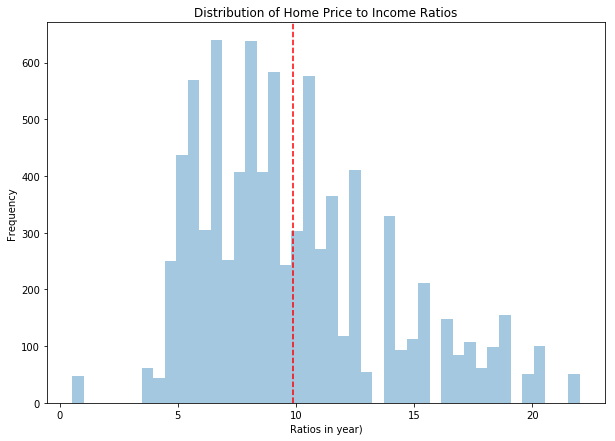

In [18]:
plt.figure(figsize=(10,7))
ax = sns.distplot(df['home_price_to_income_ratios'], kde=False)
ax.set_title('Distribution of Home Price to Income Ratios')
ax.set_ylabel('Frequency')
ax.set_xlabel('Ratios in year)')
plt.axvline(x=df['home_price_to_income_ratios'].mean(), color='r', linestyle='--');

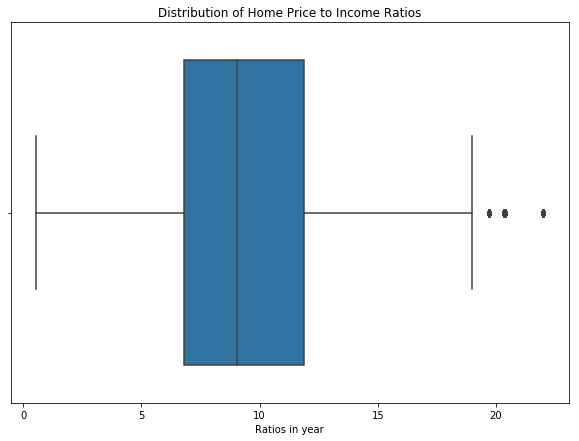

In [19]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(df['home_price_to_income_ratios'])
ax.set_title('Distribution of Home Price to Income Ratios')
ax.set_xlabel('Ratios in year');

## EDA: Numerical Data

In [20]:
df_numerical_columns = df.select_dtypes(include = 'number')

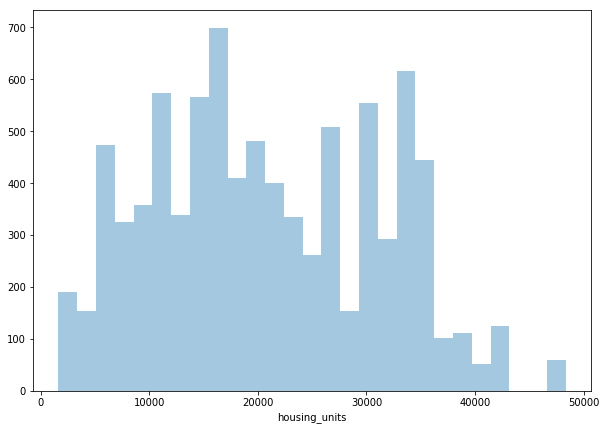

In [21]:
plt.figure(figsize=(10,7))
ax = sns.distplot(df['housing_units'].dropna(), kde=False)

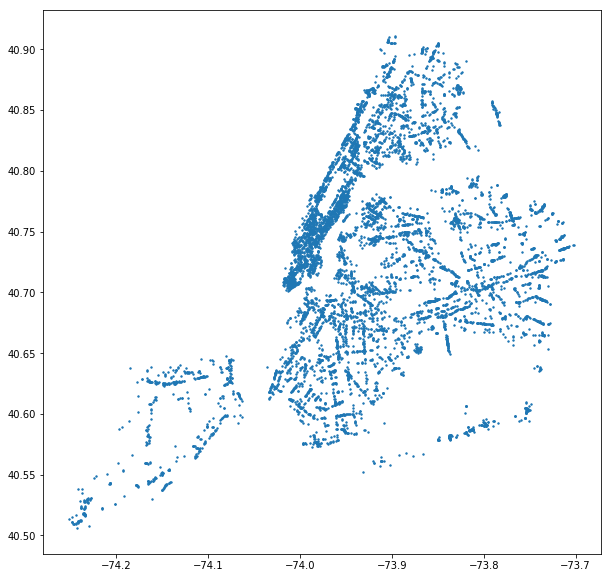

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(df['location_lng'], df['location_lat'], s=2)

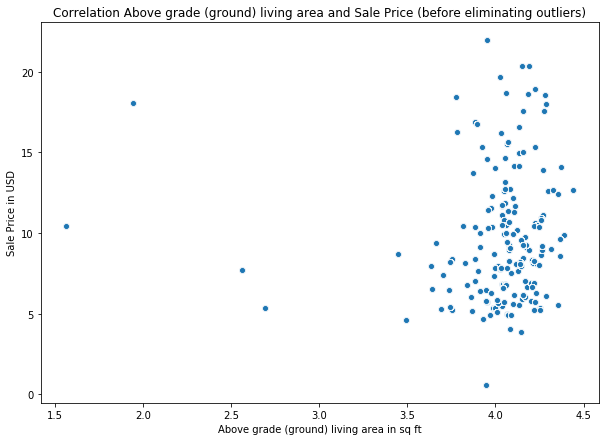

In [147]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x=df['avg_rating_by_zipcode'], y=df['home_price_to_income_ratios'])
ax.set_title('Correlation Above grade (ground) living area and Sale Price (before eliminating outliers)')
ax.set_xlabel('Above grade (ground) living area in sq ft')
ax.set_ylabel('Sale Price in USD');

In [23]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    '''
    Generate a heatmap of dependent variable's correlation with y
    '''
    plt.figure(figsize=(8, 30))
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 
    return g

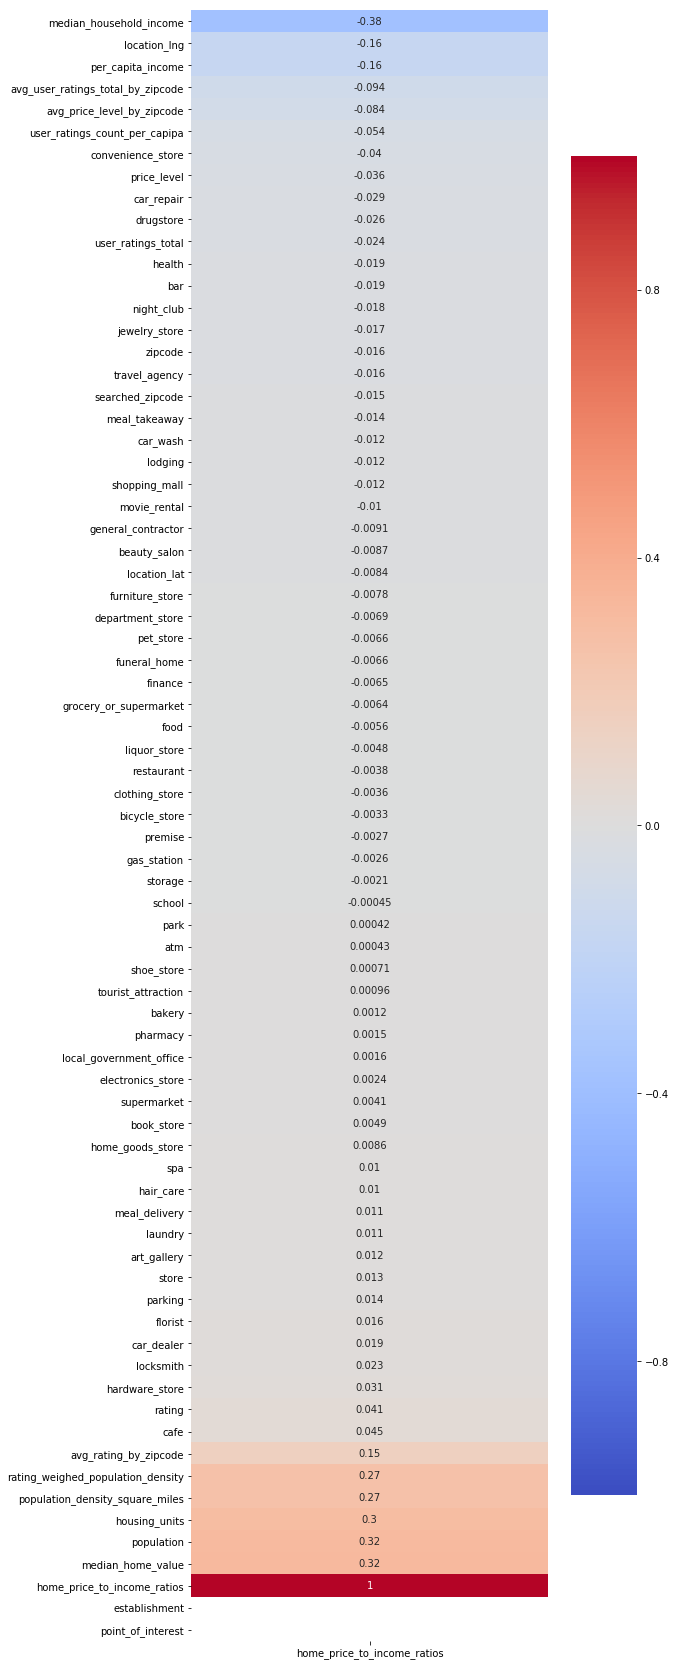

In [24]:
heatmap_numeric_w_dependent_variable(df, 'home_price_to_income_ratios')

In [25]:
df.head()

,city,state,zipcode,name,open_now,place_id,price_level,rating,user_ratings_total,searched_keyword,searched_zipcode,location_lat,location_lng,compound_code,global_code,art_gallery,atm,bakery,bar,beauty_salon,bicycle_store,book_store,cafe,car_dealer,car_repair,car_wash,clothing_store,convenience_store,department_store,drugstore,electronics_store,establishment,finance,florist,food,funeral_home,furniture_store,gas_station,general_contractor,grocery_or_supermarket,hair_care,hardware_store,health,home_goods_store,jewelry_store,laundry,liquor_store,local_government_office,locksmith,lodging,meal_delivery,meal_takeaway,movie_rental,night_club,park,parking,pet_store,pharmacy,point_of_interest,premise,restaurant,school,shoe_store,shopping_mall,spa,storage,store,supermarket,tourist_attraction,travel_agency,median_household_income,per_capita_income,population,population_density_square_miles,housing_units,median_home_value,home_price_to_income_ratios,avg_price_level_by_zipcode,avg_rating_by_zipcode,avg_user_ratings_total_by_zipcode,user_ratings_count_per_capipa,rating_weighed_population_density
0,New York,NY,10001,Sprint Store,True,ChIJCV0vTalZwokR61PIDIe0gI0,2.0,3.4,276,stores,10001,40.750269,-73.989655,Q226+44 New York,87G8Q226+44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,88526.0,84765.0,22924,37306.6,14141,343400.0,3.879086,2.0,4.144262,1900.721311,0.012040,126842.44
1,New York,NY,10001,Duane Reade,True,ChIJJwQ3561ZwokRuYknT0uxER8,2.0,3.9,50,stores,10001,40.751744,-73.993482,Q224+MJ New York,87G8Q224+MJ,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,88526.0,84765.0,22924,37306.6,14141,343400.0,3.879086,2.0,4.144262,1900.721311,0.002181,145495.74
2,New York,NY,10001,Macy's,True,ChIJ3xjWra5ZwokRrwJ0KZ4yKNs,2.0,4.4,51032,stores,10001,40.750802,-73.989483,Q226+86 New York,87G8Q226+86,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,88526.0,84765.0,22924,37306.6,14141,343400.0,3.879086,2.0,4.144262,1900.721311,2.226139,164149.04
3,New York,NY,10001,Uniqlo,True,ChIJX6mEEqlZwokRtDQOWIDVc3I,1.0,4.4,3962,stores,10001,40.749488,-73.986632,P2X7+Q8 New York,87G8P2X7+Q8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,88526.0,84765.0,22924,37306.6,14141,343400.0,3.879086,2.0,4.144262,1900.721311,0.172832,164149.04
4,New York,NY,10001,B&H Photo Video - Electronics and Camera Store,False,ChIJI93dPbJZwokRIoOEoivEDQs,NaN,4.6,22772,stores,10001,40.752945,-73.996337,Q233+5F New York,87G8Q233+5F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,88526.0,84765.0,22924,37306.6,14141,343400.0,3.879086,2.0,4.144262,1900.721311,0.993369,171610.36


In [26]:
df.columns

Index(['city', 'state', 'zipcode', 'name', 'open_now', 'place_id',
       'price_level', 'rating', 'user_ratings_total', 'searched_keyword',
       'searched_zipcode', 'location_lat', 'location_lng', 'compound_code',
       'global_code', 'art_gallery', 'atm', 'bakery', 'bar', 'beauty_salon',
       'bicycle_store', 'book_store', 'cafe', 'car_dealer', 'car_repair',
       'car_wash', 'clothing_store', 'convenience_store', 'department_store',
       'drugstore', 'electronics_store', 'establishment', 'finance', 'florist',
       'food', 'funeral_home', 'furniture_store', 'gas_station',
       'general_contractor', 'grocery_or_supermarket', 'hair_care',
       'hardware_store', 'health', 'home_goods_store', 'jewelry_store',
       'laundry', 'liquor_store', 'local_government_office', 'locksmith',
       'lodging', 'meal_delivery', 'meal_takeaway', 'movie_rental',
       'night_club', 'park', 'parking', 'pet_store', 'pharmacy',
       'point_of_interest', 'premise', 'restaurant', 'school',

## Modeling

In [27]:
columns = [
     'price_level', 'rating', 'user_ratings_total', 
      'art_gallery', 'atm', 'bakery', 'bar', 'beauty_salon',
       'bicycle_store', 'book_store', 'cafe', 'car_dealer', 'car_repair',
       'car_wash', 'clothing_store', 'convenience_store', 'department_store',
       'drugstore', 'electronics_store', 'establishment', 'finance', 'florist',
       'food', 'funeral_home', 'furniture_store', 'gas_station',
       'general_contractor', 'grocery_or_supermarket', 'hair_care',
       'hardware_store', 'health', 'home_goods_store', 'jewelry_store',
       'laundry', 'liquor_store', 'local_government_office', 'locksmith',
       'lodging', 'meal_delivery', 'meal_takeaway', 'movie_rental',
       'night_club', 'park', 'parking', 'pet_store', 'pharmacy',
       'point_of_interest', 'premise', 'restaurant', 'school', 'shoe_store',
       'shopping_mall', 'spa', 'storage', 'store', 'supermarket',
       'tourist_attraction', 'travel_agency',  
       'population', 'population_density_square_miles',
       'housing_units', 'home_price_to_income_ratios',
       'avg_price_level_by_zipcode', 'avg_rating_by_zipcode',
       'avg_user_ratings_total_by_zipcode', 'user_ratings_count_per_capipa',
       'rating_weighed_population_density']


In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVR, SVC


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer, f1_score

%matplotlib inline

In [30]:
final = df[columns].dropna()

In [31]:
final.head()

,price_level,rating,user_ratings_total,art_gallery,atm,bakery,bar,beauty_salon,bicycle_store,book_store,cafe,car_dealer,car_repair,car_wash,clothing_store,convenience_store,department_store,drugstore,electronics_store,establishment,finance,florist,food,funeral_home,furniture_store,gas_station,general_contractor,grocery_or_supermarket,hair_care,hardware_store,health,home_goods_store,jewelry_store,laundry,liquor_store,local_government_office,locksmith,lodging,meal_delivery,meal_takeaway,movie_rental,night_club,park,parking,pet_store,pharmacy,point_of_interest,premise,restaurant,school,shoe_store,shopping_mall,spa,storage,store,supermarket,tourist_attraction,travel_agency,population,population_density_square_miles,housing_units,home_price_to_income_ratios,avg_price_level_by_zipcode,avg_rating_by_zipcode,avg_user_ratings_total_by_zipcode,user_ratings_count_per_capipa,rating_weighed_population_density
0,2.0,3.4,276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,22924,37306.6,14141,3.879086,2.0,4.144262,1900.721311,0.012040,126842.44
1,2.0,3.9,50,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,22924,37306.6,14141,3.879086,2.0,4.144262,1900.721311,0.002181,145495.74
2,2.0,4.4,51032,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,22924,37306.6,14141,3.879086,2.0,4.144262,1900.721311,2.226139,164149.04
3,1.0,4.4,3962,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,22924,37306.6,14141,3.879086,2.0,4.144262,1900.721311,0.172832,164149.04
6,3.0,4.5,235,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,22924,37306.6,14141,3.879086,2.0,4.144262,1900.721311,0.010251,167879.70


In [32]:
from sklearn.utils import shuffle
index = final.index
final = shuffle(final)
final.index = index

In [33]:

target = 'home_price_to_income_ratios'
X = final.drop(columns=target)
y = final[target]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, train_size=0.70)

In [82]:
X_train.columns

Index(['price_level', 'rating', 'user_ratings_total', 'art_gallery', 'atm',
       'bakery', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'cafe',
       'car_dealer', 'car_repair', 'car_wash', 'clothing_store',
       'convenience_store', 'department_store', 'drugstore',
       'electronics_store', 'establishment', 'finance', 'florist', 'food',
       'funeral_home', 'furniture_store', 'gas_station', 'general_contractor',
       'grocery_or_supermarket', 'hair_care', 'hardware_store', 'health',
       'home_goods_store', 'jewelry_store', 'laundry', 'liquor_store',
       'local_government_office', 'locksmith', 'lodging', 'meal_delivery',
       'meal_takeaway', 'movie_rental', 'night_club', 'park', 'parking',
       'pet_store', 'pharmacy', 'point_of_interest', 'premise', 'restaurant',
       'school', 'shoe_store', 'shopping_mall', 'spa', 'storage', 'store',
       'supermarket', 'tourist_attraction', 'travel_agency', 'population',
       'population_density_square_miles', 'h

In [84]:
y_train

794     17.566794
4536     9.273812
3314     9.212432
6333    11.886419
8304     3.879086
          ...    
8099     3.879086
1222    16.581300
689      5.594752
6220     6.999792
7261     4.688635
Name: home_price_to_income_ratios, Length: 3654, dtype: float64

In [87]:
X_test.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

### Linear Regression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
lr.score(X_train, y_train)

0.1817782748098462

In [38]:
lr.score(X_test, y_test)

0.1711929923455815

In [39]:
cross_val_score(lr, X, y, cv=5).mean()

0.15906372360351917

### KNN

In [41]:
# Use a pipeline to combine StandardScaler and KNN
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

pipe_params = {
    'knn__n_neighbors': [3, 5, 10],
    'knn__p' : [1, 2]
}

gs_knn = GridSearchCV(
    pipe,
    pipe_params,
    cv=5
).fit(X_train, y_train);

In [126]:
gs_knn.best_params_

{'knn__n_neighbors': 5, 'knn__p': 1}

In [42]:
gs_knn.best_score_

0.45688696896295655

In [43]:
gs_knn.score(X_train, y_train)

0.6897169707349375

In [44]:
gs_knn.score(X_test, y_test)

0.5255910519194276

In [45]:
cross_val_score(gs_knn.best_estimator_, X, y, scoring='r2', cv=5).mean()

0.5368618881353896

### Tree

In [46]:
# Use grid search to find best hyperparams
gs_tree = GridSearchCV(
    estimator = DecisionTreeRegressor(random_state=42),
    param_grid = {
        'max_depth' : [10, 30, 50],
        'min_samples_split' : [5, 10, 15],
        'min_samples_leaf' : [2, 3, 4],
    },
    cv=5
).fit(X_train, y_train)

In [47]:
gs_tree.best_params_

{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [48]:
gs_tree.best_score_

0.9967264971320761

In [49]:
gs_tree.score(X_train, y_train)

0.9998505489238874

In [50]:
gs_tree.score(X_test, y_test)

0.9997135447455875

In [51]:
cross_val_score(gs_tree.best_estimator_, X, y, scoring='r2', cv=5).mean()

0.9982456023921596

In [135]:
feature_importance = pd.DataFrame(dict(zip(X_train.columns, gs_tree.best_estimator_.feature_importances_)).items())

In [148]:
feature_importance = feature_importance.sort_values(by=[1])

<BarContainer object of 66 artists>

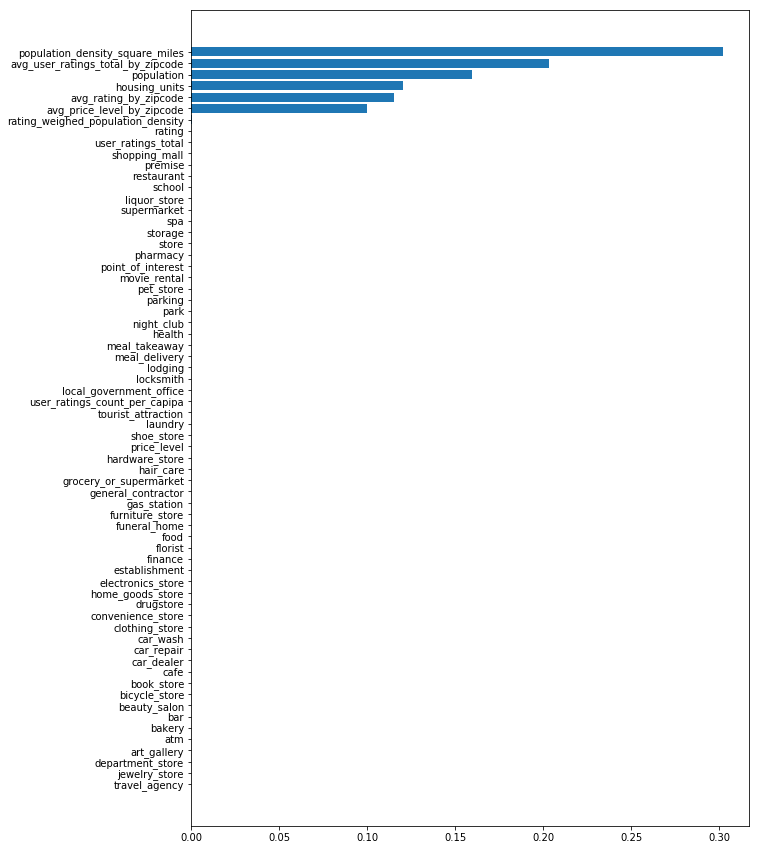

In [149]:
plt.figure(figsize=(10, 15))
plt.barh(y = feature_importance[0], width=feature_importance[1])

### Bagged Tree

In [53]:
bag = BaggingRegressor(random_state=42).fit(X_train, y_train)

In [54]:
bag.score(X_train, y_train)

0.999695740059447

In [55]:
bag.score(X_test, y_test)

0.9998826027823909

In [56]:
preds = bag.predict(X_test)

In [80]:
y_test[1:5]

4405    15.011575
918      3.879086
1567    10.834373
189      6.262744
Name: home_price_to_income_ratios, dtype: float64

In [81]:
preds[1:5]

array([15.011575  ,  3.87908637, 10.83437343,  6.26274396])

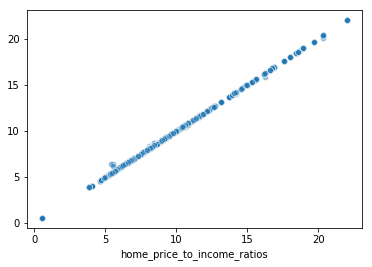

In [57]:
sns.scatterplot(x = y_test, y = preds, alpha = .5)

In [58]:
resids = y_test - preds

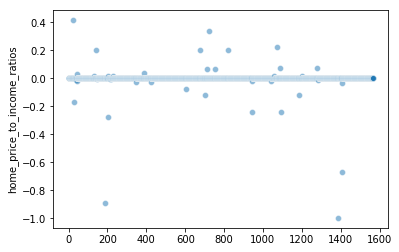

In [59]:
sns.scatterplot(x = range(len(resids)),y = resids, alpha = .5)

### Ada Boost

In [60]:
ad = AdaBoostRegressor(random_state=42).fit(X_train, y_train)

In [61]:
ad.score(X_train, y_train)

0.6321262445630966

In [62]:
ad.score(X_test, y_test)

0.6499207151937794

In [63]:
cross_val_score(ad, X, y, scoring='r2', cv=5).mean()

0.6225999345454667

In [64]:
ad.predict(X_train)

array([15.08143844, 12.23537077,  9.63079641, ...,  9.61108242,
        9.16096521,  7.86674328])

### Support Vector Machine

In [65]:
svr = SVR(gamma='scale').fit(X_train, y_train)

In [66]:
svr.score(X_train, y_train)

0.17227209478589442

In [67]:
svr.score(X_test, y_test)

0.1978444629554198

In [68]:
cross_val_score(svr, X, y, scoring='r2', cv=5).mean()

0.17558613471601145

### Baseline Model

In [69]:
from sklearn.dummy import DummyRegressor

In [123]:
# Create a dummy regressor
dummy_mean = DummyRegressor(strategy='mean', constant=20)

# "Train" dummy regressor
dummy_mean.fit(X_train, y_train)

DummyRegressor(constant=20, quantile=None, strategy='mean')

In [124]:
dummy_mean.score(X_train, y_train)

0.0

In [125]:
dummy_mean.score(X_test, y_test)

-0.00016066670563885666

### Polynomial Regression

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly = Pipeline([
    ('sc', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('lin_poly', LinearRegression())
])
poly.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lin_poly',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [75]:
poly.score(X_train, y_train)

0.8310861430434728

In [76]:
poly.score(X_test, y_test)

-1.3311130708804719e+24

In [77]:
#cross_val_score(poly, X, y, scoring='r2', cv=5).mean()

KeyboardInterrupt: 

### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
pipe_2 = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('SGD', SGDRegressor())
])

pipe_params_2 = {
    'SGD__max_iter': [1000],
    'SGD__penalty' : ['l1'],
    'SGD__tol': [1e-3]
}

gs_SGD = GridSearchCV(
    pipe_2,
    pipe_params_2,
    cv=5
    
).fit(X_train, y_train);

In [ ]:
gs_SGD.score(X_train, y_train)

In [ ]:
gs_SGD.score(X_test, y_test)